In [1]:
import os
import sys
import json
import datetime

import pandas as pd
import numpy as np

In [2]:
cwd = os.getcwd()
join = os.path.join
norm = os.path.normpath

In [3]:
sys.path.append(norm(join(cwd, '..', '..', '..', 'glhe')))

In [4]:
from standalone.plant_loop import PlantLoop
import glhe

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 14

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [7]:
d = glhe.globals.functions.load_json('LTS_Simple_input.json')
d['ground-heat-exchanger'][0]['g-function-path'] = norm(join(cwd, 'g.csv'))
d['ground-heat-exchanger'][0]['g_b-function-path'] = norm(join(cwd, 'g_b.csv'))
d['simulation']['time-step'] = 30
d['simulation']['runtime'] = 3600 * 50

In [8]:
with open(join(cwd, 'in.json'), 'w') as f:
    f.write(json.dumps(d, sort_keys=True, indent=2, separators=(',', ': ')))

In [9]:
PlantLoop('in.json').simulate()

Simulation time: 0:00:18.217267


True

In [10]:
df = pd.read_csv('out.csv', index_col=0, parse_dates=True)

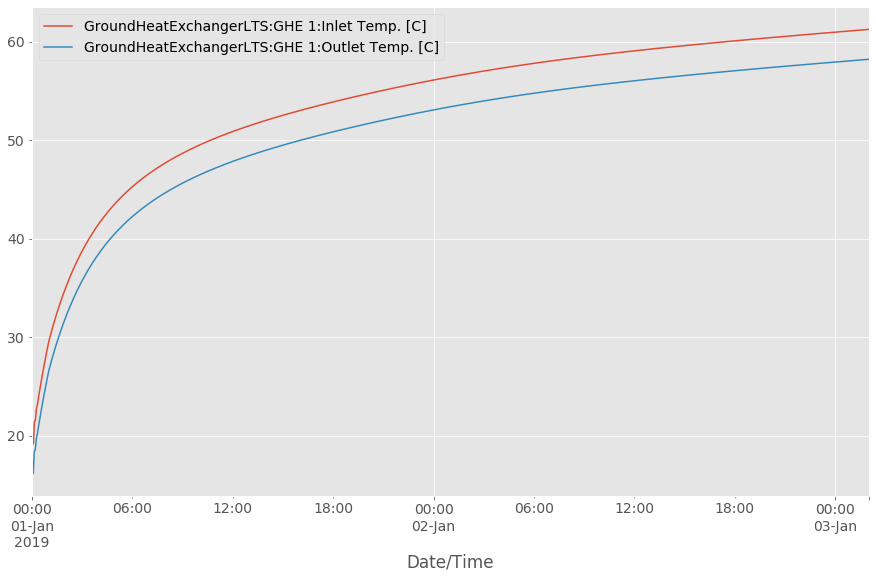

In [11]:
start_time = '2019-01-01 00:00:00'
end_time = '2019-01-03 3:00:00'

df[['GroundHeatExchangerLTS:GHE 1:Inlet Temp. [C]',
    'GroundHeatExchangerLTS:GHE 1:Outlet Temp. [C]']].loc[start_time:end_time].plot()

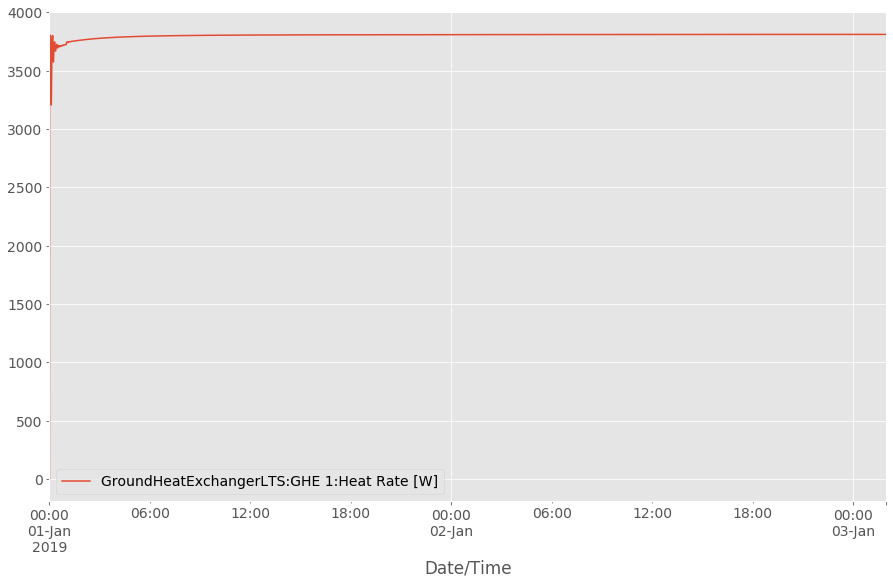

In [12]:
df[['GroundHeatExchangerLTS:GHE 1:Heat Rate [W]']].loc[start_time:end_time].plot()

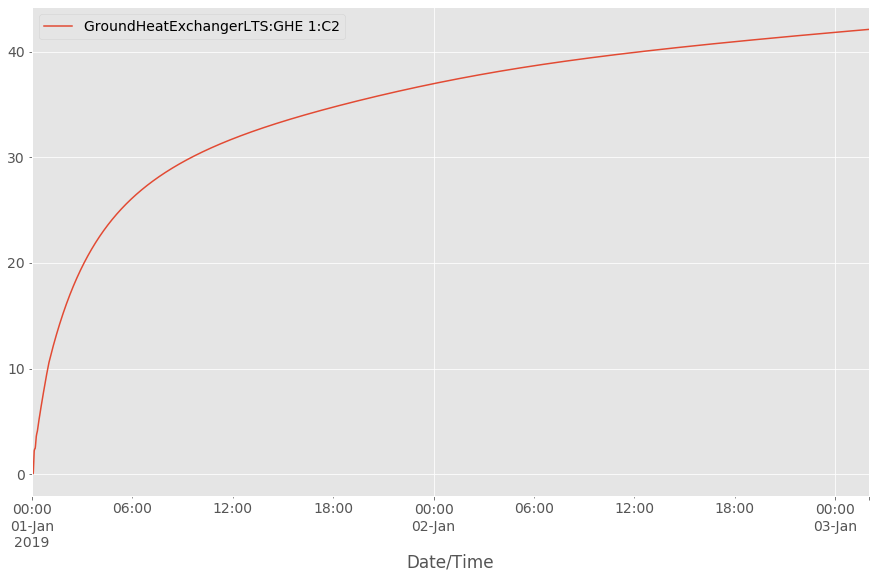

In [16]:
df[['GroundHeatExchangerLTS:GHE 1:C2']].loc[start_time:end_time].plot()